In [83]:
__author__ = "Matin Ebrahimkhani"
__copyright__ = "Copyright 2020, twitter analysis for covid tweets with nltk project"
__credits__ = ["Matin Ebrahimkhani"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Matin Ebrahimkhani"
__email__ = "mat.ebrahimkhani@iasbs.ac.ir"
__studentID__ = "994121"

import re
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from TweetProccessor import TweetProcessor
from textblob import TextBlob

In [11]:
tweet_processor = TweetProcessor()
df = pd.read_csv("Data/covid19_tweets.csv")

In [12]:
#### Section 1. Proccessing the Dataframe

# we are going to do some pre processing here first we should make sure that the data is valid and good to go
# after that we are going to use our python processor for tweets text
df['mentions'] = df.text.str.findall(r'(?<![@\w])@(\w{1,25})')  # filling the mentions
df['hashtags'] = df.text.str.findall(r'(?<![#\w])#(\w{1,25})')  # filling the hashtags properly
df['datetime'] = pd.to_datetime(df['date']) # datetime standrized
df['date'] = df['datetime'].dt.date # date only standrized

In [13]:
# since we don't need some of the coulumns we are going to drop them for now
df.drop(columns=['user_description', 'user_created','user_followers','user_friends','user_favourites','source',], inplace=True)

In [14]:
# using tweet processor for dataframe

# removing hyperlinks before the tokenization
df['text']=df['text'].apply(lambda x:re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*(),]|'
                           '(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', x))

# removing mentions and hashtags before the tokenization
df['text']=df['text'].apply(lambda x:re.sub("(@[A-Za-z0-9_]+)|([0-9]+)", '', x))

# Tokenization of each tweet
df['tokenized']=df['text'].apply(tweet_processor.tokenize)

In [15]:
# removing three types of charecter and tokens form the tokenized list
stop_words = set(stopwords.words('english'))
common_tokens=['’',"'s","…","``","''",'“','...']
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
df['tokenized'] = df['tokenized'].apply(lambda x:tweet_processor.remove(x,stop_words)) # removing stopwords from data
df['tokenized'] = df['tokenized'].apply(lambda x:tweet_processor.remove(x,punctuation)) # removing punctuation tokens from data
df['tokenized'] = df['tokenized'].apply(lambda x:tweet_processor.remove(x,common_tokens)) # removing common tokens from data

In [16]:
df['stemmed']=df['tokenized'].apply(tweet_processor.stem)


In [17]:
df['tagged_tokenized']=df['tokenized'].apply(tweet_processor.tag_pos)
df['lematized_tagged']=df['tagged_tokenized'].apply(tweet_processor.lematize)


In [18]:
#TODO: pre proccessing the user location

print(df['user_location'])
df['user_location']=df['user_location'].apply(tweet_processor.tokenize)
df['location_tokenized'] = df['location_tokenized'].apply(lambda x:tweet_processor.remove(x,common_tokens)) # removing punctuation tokens from data
most_location = df['user_location'].value_counts()[:25]
most_location.plot.bar(x='lab', y='val',title="Top locations with Most Tweets", rot=90,figsize=(10,10))
df['location_tokenized']

0                     astroworld
1                   New York, NY
2               Pewee Valley, KY
3           Stuck in the Middle 
4              Jammu and Kashmir
                   ...          
199995    Blackburn with Darwen 
199996               King's Lynn
199997         Barrow-in-Furness
199998    Lake House, Sri Lanka 
199999                     India
Name: user_location, Length: 200000, dtype: object


TypeError: expected string or bytes-like object

<AxesSubplot:title={'center':'Tweets per Day'}>

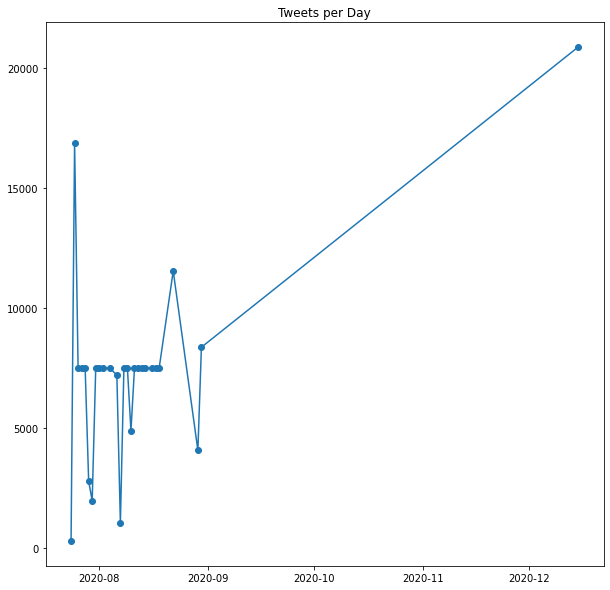

In [19]:
most_series = df['date'].value_counts()
# most_series.plot.bar(x='lab', y='val', rot=45)
most_series.sort_index(inplace=True)
most_series.plot(marker='o',title= "Tweets per Day",figsize=(10,10))

<AxesSubplot:title={'center':'Most Mentioned Accounts'}>

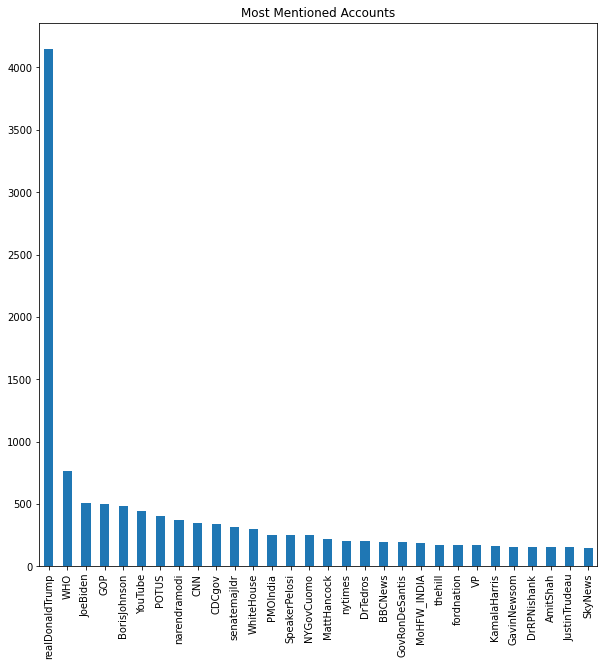

In [20]:
list_of_lists = df['mentions'].tolist()
mentioned= []
for lst in list_of_lists:
    for attr in lst:
        mentioned.append(attr)
most_mentioned = pd.Series(mentioned).value_counts()[:30]
most_mentioned.plot.bar(x='accounts', y='mention times',title="Most Mentioned Accounts", rot=90, figsize=(10,10))



<AxesSubplot:title={'center':'Most trend hashtags'}>

C:\ProgramData\Anaconda3\envs\cspractical\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\cspractical\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


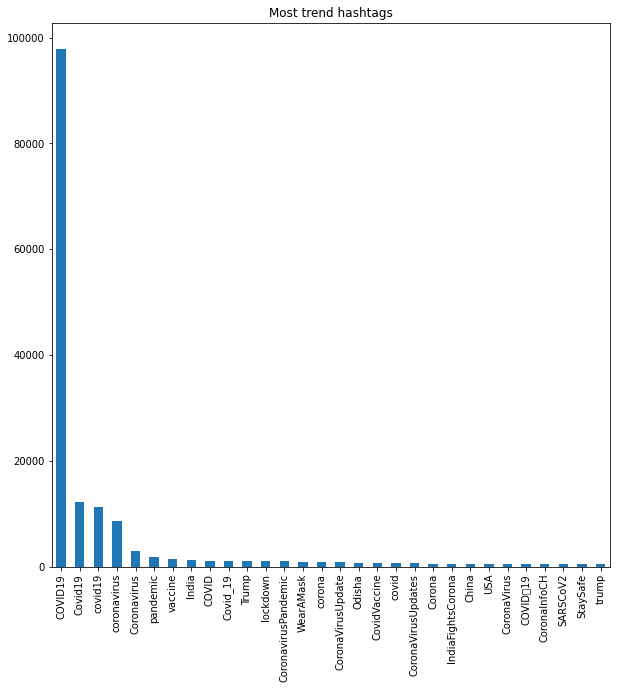

In [21]:
list_of_lists = df['hashtags'].tolist()
hashtags= []
for lst in list_of_lists:
    for attr in lst:
        hashtags.append(attr)
most_hashtaged = pd.Series(hashtags).value_counts()[:30]
most_hashtaged.plot.bar(x='Hashtags', y='number of use',title="Most trend hashtags", rot=90, figsize=(10,10))




<AxesSubplot:title={'center':'Most trend unigrams'}>

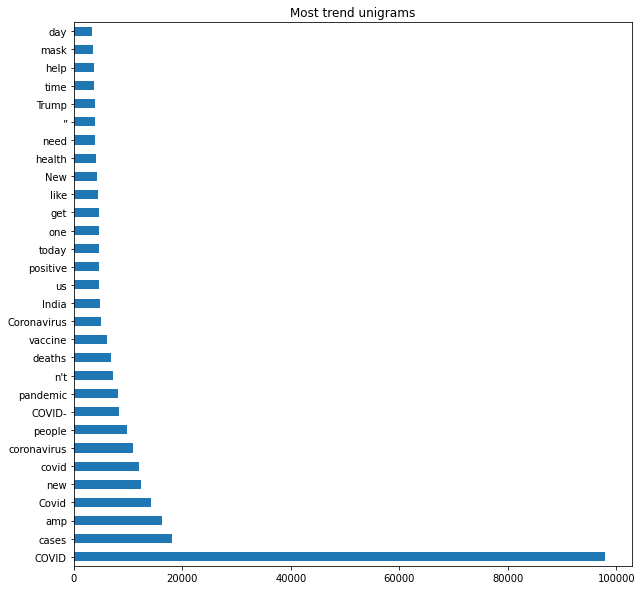

In [22]:
df['unigrams'] = df['tokenized'].apply(lambda x:[ ' '.join(grams) for grams in tweet_processor.extract_ngrams(x,1)])
list_of_lists = df['unigrams'].tolist()
unigrams= []
for lst in list_of_lists:
    for attr in lst:
        unigrams.append(attr)
most_unigrams = pd.Series(unigrams).value_counts()[:30]
most_unigrams.plot.barh(x='unigram', y='number of use',title="Most trend unigrams", figsize=(10,10))

<AxesSubplot:title={'center':'Most trend bigrams'}>

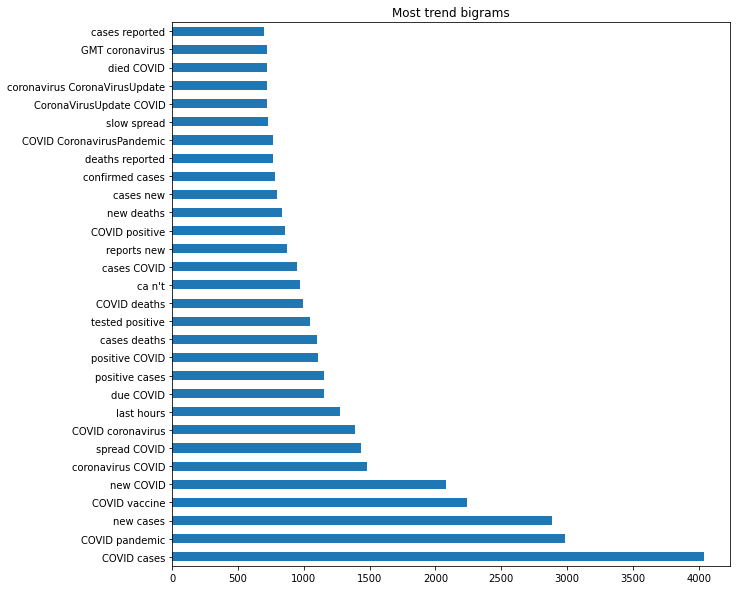

In [23]:
df['bigrams'] = df['tokenized'].apply(lambda x:[ ' '.join(grams) for grams in tweet_processor.extract_ngrams(x,2)])
list_of_lists = df['bigrams'].tolist()
bigrams= []
for lst in list_of_lists:
    for attr in lst:
        bigrams.append(attr)
most_bigrams = pd.Series(bigrams).value_counts()[:30]
most_bigrams.plot.barh(x='unigram', y='number of use',title="Most trend bigrams", figsize=(10,10))

<AxesSubplot:title={'center':'Most trend trigrams'}>

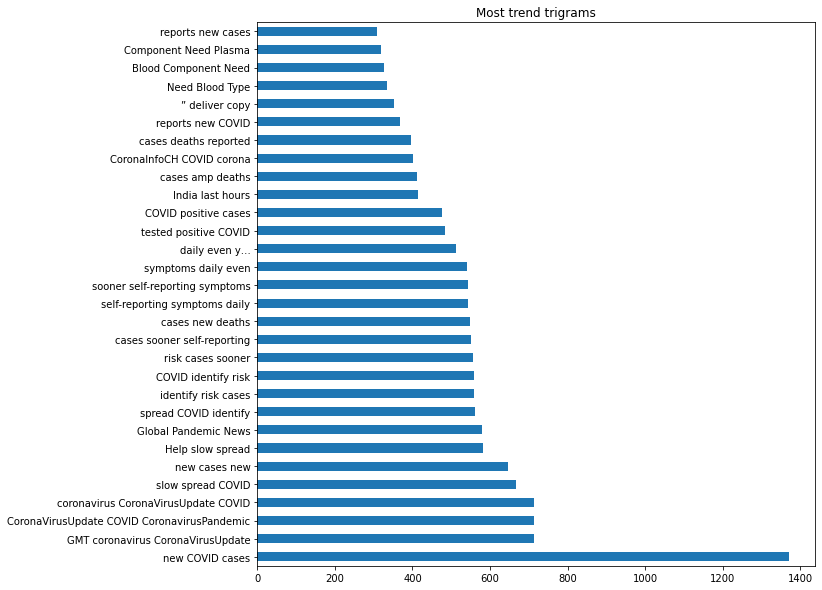

In [24]:
df['trigrams'] = df['tokenized'].apply(lambda x:[ ' '.join(grams) for grams in tweet_processor.extract_ngrams(x,3)])
list_of_lists = df['trigrams'].tolist()
trigrams= []
for lst in list_of_lists:
    for attr in lst:
        trigrams.append(attr)
most_trigrams = pd.Series(trigrams).value_counts()[:30]
most_trigrams.plot.barh(x='unigram', y='number of use',title="Most trend trigrams", figsize=(10,10))



In [58]:
from textblob import TextBlob
df['sentiment']= df['text'].apply(lambda x: TextBlob(x))
df['polarity'] = df['sentiment'].apply(lambda x: x.polarity)
def determine_polarity(polarity):
    threshhold = 0
    if polarity> threshhold:
        return 'Positive'
    elif polarity< -(threshhold):
        return 'Negative'
    else:
        return 'Neutral'
df['polarity classified'] = df['polarity'].apply(lambda x : determine_polarity(x))


NameError: name 'polarity' is not defined

<AxesSubplot:title={'center':'Tweet Sentiment'}>

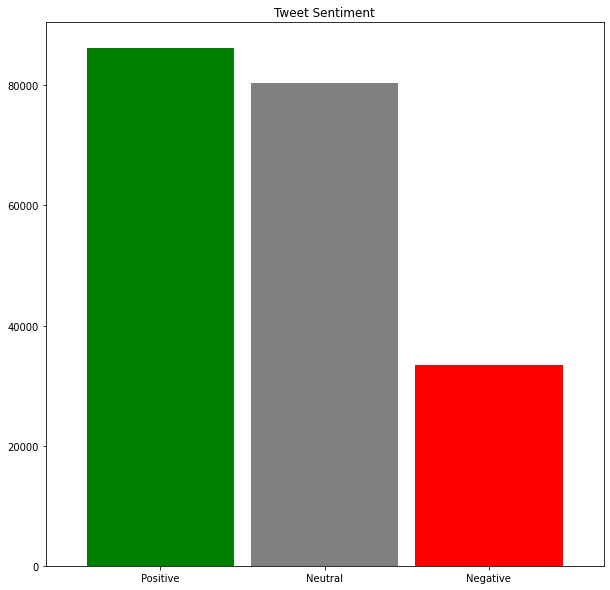

In [57]:
df['polarity classified'].value_counts().plot(kind='bar',title="Tweet Sentiment",rot=0, figsize=(10,10),color= ['green','gray','red'],width=0.9)


ConversionError: Failed to convert value(s) to axis units: array([datetime.datetime(2020, 7, 24, 0, 0), 0.4454545454545455],
      dtype=object)

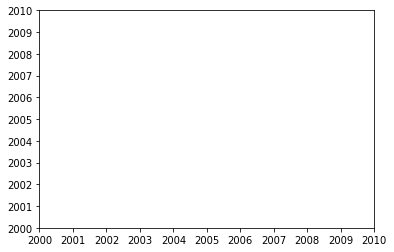

In [108]:
from datetime import datetime

date_grouped = df['date'].value_counts()
date_grouped.sort_index(inplace=True)
date_grouped = pd.DataFrame(date_grouped)
date_grouped['polarities'] = df.groupby('date')['polarity'].apply(list)
date_flat =[]
for d in date_grouped.index : 
    for pol_array in date_grouped['polarities']:
        for pol in pol_array:
            date_flat.append((datetime(d.year,d.month,d.day),pol))
date_flat[:10]
# date_grouped
plt.plot_date(x=date_flat[:][0],y=date_flat[:][1]);
# plt.xticks(date_flat[:][0],date_flat[:][0])        

In [109]:
# def rolling_mean(interval,windowsize):
#     window = np.ones(int(windowsize)/float(windowsize))
#     return np.convolve(interval,window,'same')
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
date_grouped['rolling_mean'] = date_grouped['polarities'].apply(lambda x: moving_average(x,5))

In [110]:
date_grouped
#TODO: plotting this pice of shit 


,date,polarities,rolling_mean
2020-07-24,295,"[0.4454545454545455, 0.0, 0.1, -0.3, -0.35, 0....","[-0.020909090909090888, -0.10999999999999999, ..."
2020-07-25,16881,"[-0.25, 0.5, 0.0, 0.0, 0.0, -0.699999999999999...","[0.05, -0.039999999999999966, -0.1299999999999..."
2020-07-26,7500,"[-0.11666666666666665, 0.0, -0.166666666666666...","[-0.016666666666666663, -0.0033333333333333296..."
2020-07-27,7500,"[0.13636363636363635, 0.21666666666666667, 0.1...","[0.12212121212121212, 0.12212121212121212, 0.0..."
2020-07-28,7500,"[0.13636363636363635, 0.0, 0.375, 0.0, 0.0, 0....","[0.10227272727272727, 0.075, 0.015000000000000..."
2020-07-29,2780,"[0.3, 0.13636363636363635, 0.3666666666666667,...","[0.2846060606060606, 0.22460606060606061, 0.19..."
2020-07-30,1980,"[0.10000000000000002, 0.13454545454545455, 0.0...","[0.046909090909090914, 0.02690909090909091, -0..."
2020-07-31,7500,"[-1.0, -0.1736111111111111, 0.5, -0.3333333333...","[-0.10138888888888889, -0.02138888888888888, 0..."
2020-08-01,7500,"[0.0, -0.75, 0.4166666666666667, 0.35, 0.16363...","[0.03606060606060606, 0.03606060606060606, 0.2..."
2020-08-02,7500,"[0.0, 0.13636363636363635, 0.0, 0.21875, -0.57...","[-0.04397727272727272, -0.04397727272727272, -..."
